Prompt: I have a file named card_transdata.csv and I want to analyze it for fraud detection. The dataset has the following columns: distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, and fraud. 
   - Show the head, shape, info, and describe the data. Then check for missing values and copy the new data with dropped values into data_cleaned.
   - Show the distribution of the fraud column (how many fraudulent vs. non-fraudulent transactions).
   - Visualize the distributions of other features like used_pin_number, repeat_retailer, used_chip, online_order, distance_from_last_transaction, ratio_to_median_purchase_price, and distance_from_home.
   - Explore the relationship between these features and the fraud column (e.g., percentage of fraudulent transactions when a PIN was used or not).

AI: ChatGPT 4o

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("card_transdata.csv")

# Display the first few rows of the dataset
print(data.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  


In [2]:
# Display Shape and info
print(data.shape)

(999, 8)


In [3]:
print(data.info)

<bound method DataFrame.info of      distance_from_home  distance_from_last_transaction  \
0             57.877857                        0.311140   
1             10.829943                        0.175592   
2              5.091079                             NaN   
3              2.247564                        5.600044   
4             44.190936                        0.566486   
..                  ...                             ...   
994            3.005300                        1.326847   
995            9.873417                        1.022586   
996          168.091703                        6.304360   
997           44.047622                        0.510298   
998            2.998418                        0.193681   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                          1.945940              1.0        1.0   
1                          1.294219              1.0        NaN   
2                          0.427715              1.0      

In [4]:
# Describe data
data.describe

<bound method NDFrame.describe of      distance_from_home  distance_from_last_transaction  \
0             57.877857                        0.311140   
1             10.829943                        0.175592   
2              5.091079                             NaN   
3              2.247564                        5.600044   
4             44.190936                        0.566486   
..                  ...                             ...   
994            3.005300                        1.326847   
995            9.873417                        1.022586   
996          168.091703                        6.304360   
997           44.047622                        0.510298   
998            2.998418                        0.193681   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                          1.945940              1.0        1.0   
1                          1.294219              1.0        NaN   
2                          0.427715              1.0    

In [5]:
# Check for missing values
print(data.isnull().sum())

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


In [6]:
# Drop rows with null values
data_cleaned = data.dropna().copy()

0    901
1     76
Name: fraud, dtype: int64


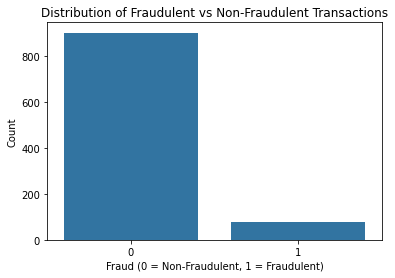

In [7]:
# Distribution of fraud vs non-fraudulent transactions
fraud_counts = data_cleaned['fraud'].value_counts()
print(fraud_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Fraud (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.ylabel("Count")
plt.show()

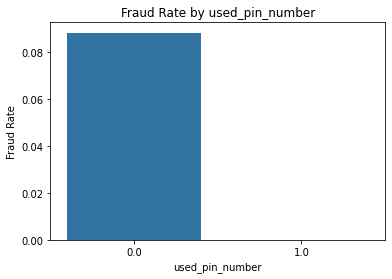

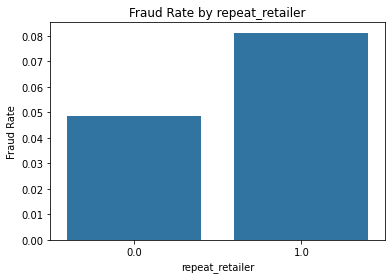

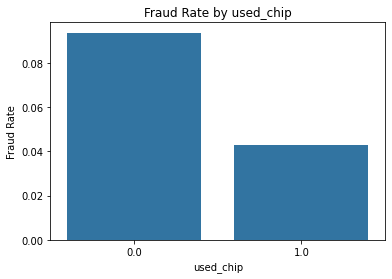

In [8]:
# Percentage of fraudulent transactions by categorical features
categorical_features = ['used_pin_number', 'repeat_retailer', 'used_chip']

for feature in categorical_features:
    fraud_rate = data_cleaned.groupby(feature)['fraud'].mean()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
    plt.title(f"Fraud Rate by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Fraud Rate")
    plt.show()

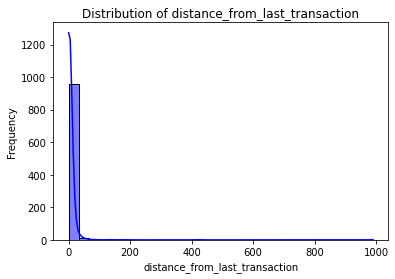

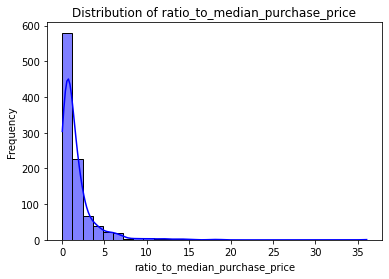

In [9]:
# List of features to visualize
features = ['distance_from_last_transaction', 'ratio_to_median_purchase_price']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_cleaned[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

Create a bar plot of transactions with PIN vs fraudulent transactions with a color coded legend of fraud of green and red. Then stack the barplot. 

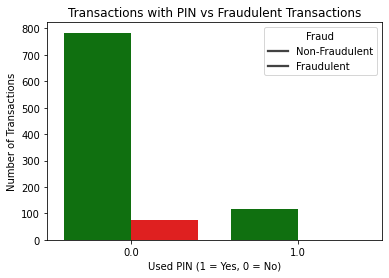

In [10]:
# Group data by 'used_pin_number' and 'fraud' status
pin_fraud_counts = data_cleaned.groupby(['used_pin_number', 'fraud']).size().reset_index(name='count')

# Create a bar plot
sns.barplot(
    data=pin_fraud_counts,
    x='used_pin_number',
    y='count',
    hue='fraud',
    palette=['green', 'red']
)

# Add labels and title
plt.title('Transactions with PIN vs Fraudulent Transactions')
plt.xlabel('Used PIN (1 = Yes, 0 = No)')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()


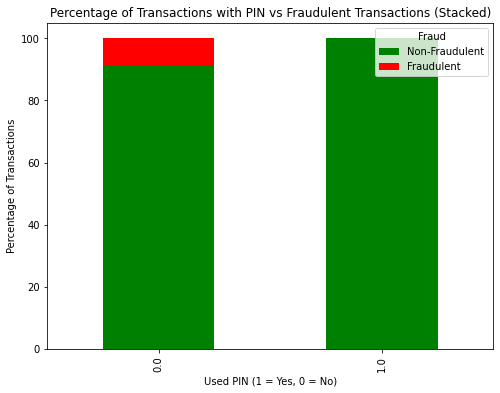

In [11]:
# Ensure the percentage column is calculated
pin_fraud_counts['percentage'] = pin_fraud_counts.groupby('used_pin_number')['count'].transform(lambda x: (x / x.sum()) * 100)

# Pivot data for a stacked bar plot
pivot_data = pin_fraud_counts.pivot(index='used_pin_number', columns='fraud', values='percentage').fillna(0)

# Create a stacked bar plot
pivot_data.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6)
)

# Add labels and title
plt.title('Percentage of Transactions with PIN vs Fraudulent Transactions (Stacked)')
plt.xlabel('Used PIN (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()


Create a count plot in python to show the number of transactions that were fraudulent vs non fraudulent when a transaction was from the same retailer or not. Also create a stacked boxplot to show the percentage of fraudulent transaction was from the same retailer or not.

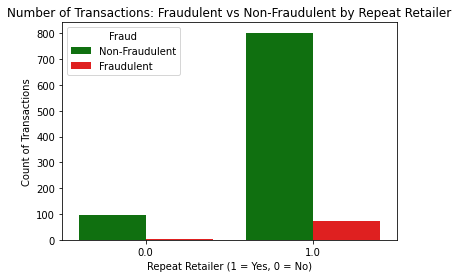

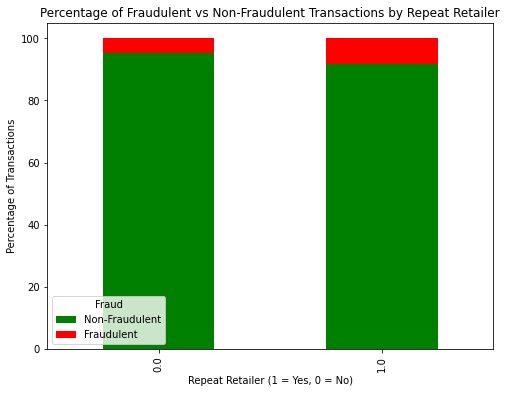

In [12]:
# Count plot for transactions: fraudulent vs non-fraudulent by repeat retailer
sns.countplot(data=data_cleaned, x='repeat_retailer', hue='fraud', palette={0: 'green', 1: 'red'})
plt.title('Number of Transactions: Fraudulent vs Non-Fraudulent by Repeat Retailer')
plt.xlabel('Repeat Retailer (1 = Yes, 0 = No)')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Percentage calculation for stacked bar plot
repeat_retailer_fraud = data_cleaned.groupby(['repeat_retailer', 'fraud']).size().reset_index(name='count')
repeat_retailer_fraud['percentage'] = repeat_retailer_fraud.groupby('repeat_retailer')['count'].transform(lambda x: (x / x.sum()) * 100)

# Pivot for stacked bar plot
pivot_data = repeat_retailer_fraud.pivot(index='repeat_retailer', columns='fraud', values='percentage').fillna(0)

# Create a stacked bar plot for percentage
pivot_data.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6)
)

# Add labels and title for percentage plot
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions by Repeat Retailer')
plt.xlabel('Repeat Retailer (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


Create a count plot in python to show the number of transactions that were fraudulent vs non fraudulent when a chip was used. Also create a stacked boxplot to show the percentage of fraudulent transaction when a chip was used.


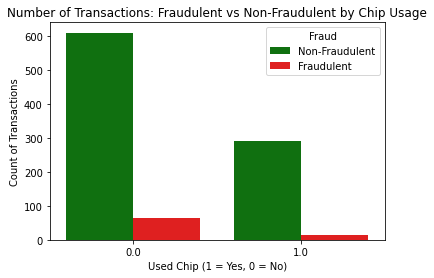

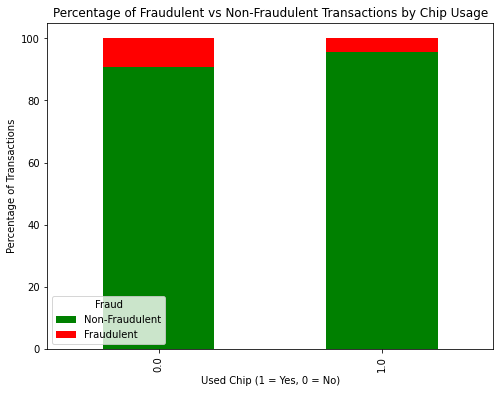

In [13]:
# Count plot for transactions: fraudulent vs non-fraudulent by chip usage
sns.countplot(data=data_cleaned, x='used_chip', hue='fraud', palette={0: 'green', 1: 'red'})
plt.title('Number of Transactions: Fraudulent vs Non-Fraudulent by Chip Usage')
plt.xlabel('Used Chip (1 = Yes, 0 = No)')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Percentage calculation for stacked bar plot
chip_fraud = data_cleaned.groupby(['used_chip', 'fraud']).size().reset_index(name='count')
chip_fraud['percentage'] = chip_fraud.groupby('used_chip')['count'].transform(lambda x: (x / x.sum()) * 100)

# Pivot for stacked bar plot
pivot_data_chip = chip_fraud.pivot(index='used_chip', columns='fraud', values='percentage').fillna(0)

# Create a stacked bar plot for percentage
pivot_data_chip.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6)
)

# Add labels and title for percentage plot
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions by Chip Usage')
plt.xlabel('Used Chip (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


Now make the two graphs based on when it was an online order


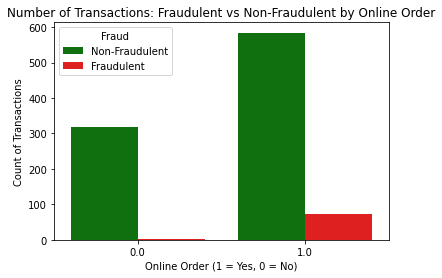

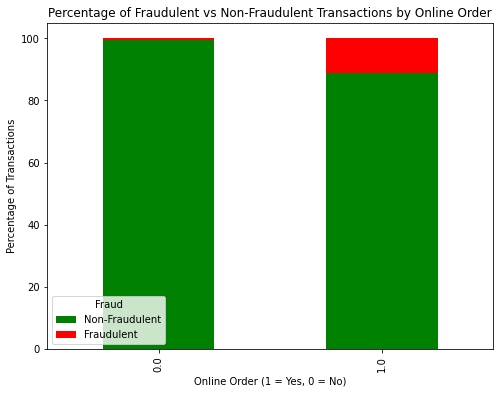

In [14]:
# Count plot for transactions: fraudulent vs non-fraudulent by online order
sns.countplot(data=data_cleaned, x='online_order', hue='fraud', palette={0: 'green', 1: 'red'})
plt.title('Number of Transactions: Fraudulent vs Non-Fraudulent by Online Order')
plt.xlabel('Online Order (1 = Yes, 0 = No)')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Percentage calculation for stacked bar plot
online_order_fraud = data_cleaned.groupby(['online_order', 'fraud']).size().reset_index(name='count')
online_order_fraud['percentage'] = online_order_fraud.groupby('online_order')['count'].transform(lambda x: (x / x.sum()) * 100)

# Pivot for stacked bar plot
pivot_data_online = online_order_fraud.pivot(index='online_order', columns='fraud', values='percentage').fillna(0)

# Create a stacked bar plot for percentage
pivot_data_online.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6)
)

# Add labels and title for percentage plot
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions by Online Order')
plt.xlabel('Online Order (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


Create a scatterplot in python to show the breakdown of fraudulent and non fraudulent transactions of distance from home vs ratio to median purchase price. Then create another one for distance from home vs distance from last transaction. Then another one for distance from last transaction vs ratio to median purchase price.

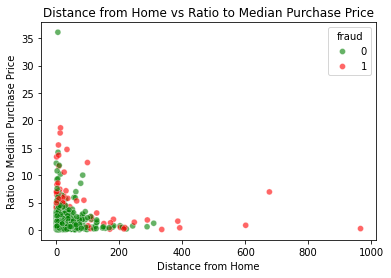

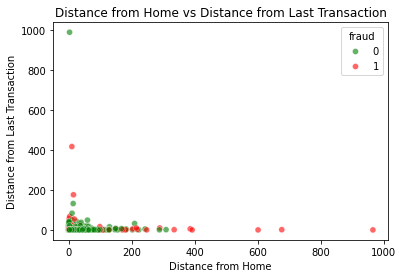

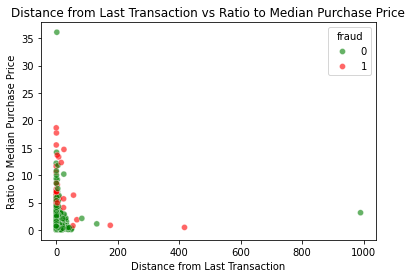

In [15]:
# Scatterplot: Distance from Home vs Ratio to Median Purchase Price
sns.scatterplot(
    data=data_cleaned,
    x='distance_from_home',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)
plt.title('Distance from Home vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()

# Scatterplot: Distance from Home vs Distance from Last Transaction
sns.scatterplot(
    data=data_cleaned,
    x='distance_from_home',
    y='distance_from_last_transaction',
    hue='fraud',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)
plt.title('Distance from Home vs Distance from Last Transaction')
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.show()

# Scatterplot: Distance from Last Transaction vs Ratio to Median Purchase Price
sns.scatterplot(
    data=data_cleaned,
    x='distance_from_last_transaction',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)
plt.title('Distance from Last Transaction vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')

plt.show()


Build a simple "Never Fraud" model that always predicts a transaction as non-fraudulent.

Build a k-Nearest Neighbors (k-NN) model to predict fraud.

Create a confusion matrix and a classification report for the models. 

Compare the performance of the two models.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing the data
X = data_cleaned.drop(columns=['fraud'])
y = data_cleaned['fraud']

# One-hot encoding for categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Confusion Matrix for Never Fraud Model:
[[272   0]
 [ 22   0]]


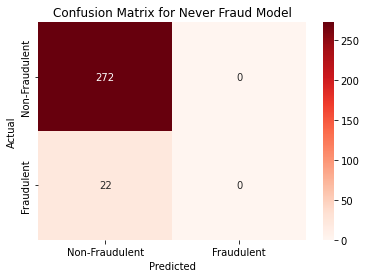


Classification Report for Never Fraud Model:
                precision    recall  f1-score   support

Non-Fraudulent       0.93      1.00      0.96       272
    Fraudulent       0.00      0.00      0.00        22

      accuracy                           0.93       294
     macro avg       0.46      0.50      0.48       294
  weighted avg       0.86      0.93      0.89       294

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

Confusion Matrix for k-NN Model:
[[267   5]
 [ 13   9]]


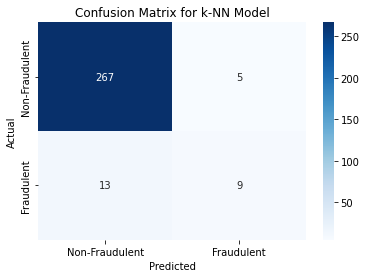


Classification Report for k-NN Model:
                precision    recall  f1-score   support

Non-Fraudulent       0.95      0.98      0.97       272
    Fraudulent       0.64      0.41      0.50        22

      accuracy                           0.94       294
     macro avg       0.80      0.70      0.73       294
  weighted avg       0.93      0.94      0.93       294



In [17]:
# "Never Fraud" Model (baseline)
y_pred_never_fraud = [0] * len(y_test)
print(y_pred_never_fraud[:100])

# Confusion Matrix and Classification Report for "Never Fraud" Model
conf_matrix_never_fraud = confusion_matrix(y_test, y_pred_never_fraud)
print("Confusion Matrix for Never Fraud Model:")
print(conf_matrix_never_fraud)

sns.heatmap(conf_matrix_never_fraud, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Confusion Matrix for Never Fraud Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report for Never Fraud Model:")
print(classification_report(y_test, y_pred_never_fraud, target_names=['Non-Fraudulent', 'Fraudulent'], zero_division=0))


# k-Nearest Neighbors (k-NN) Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict with k-NN model
y_pred_knn = knn.predict(X_test)
print(y_pred_knn[:100])

# Confusion Matrix and Classification Report for k-NN Model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for k-NN Model:")
print(conf_matrix_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Confusion Matrix for k-NN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report for k-NN Model:")
print(classification_report(y_test, y_pred_knn, target_names=['Non-Fraudulent', 'Fraudulent']))

Compute the accuracy, precision, recall, and f1 for both models

Compare the metrics in a bargraph.

In [18]:
# Metrics for "Never Fraud" Model
accuracy_never_fraud = accuracy_score(y_test, y_pred_never_fraud)
precision_never_fraud = precision_score(y_test, y_pred_never_fraud, zero_division=0)
recall_never_fraud = recall_score(y_test, y_pred_never_fraud)
f1_never_fraud = f1_score(y_test, y_pred_never_fraud)

print("Metrics for Never Fraud Model:")
print(f"Accuracy: {accuracy_never_fraud:.4f}")
print(f"Precision: {precision_never_fraud:.4f}")
print(f"Recall: {recall_never_fraud:.4f}")
print(f"F1 Score: {f1_never_fraud:.4f}")
print("\n")

# Metrics for k-NN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Metrics for k-NN Model:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Metrics for Never Fraud Model:
Accuracy: 0.9252
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


Metrics for k-NN Model:
Accuracy: 0.9388
Precision: 0.6429
Recall: 0.4091
F1 Score: 0.5000


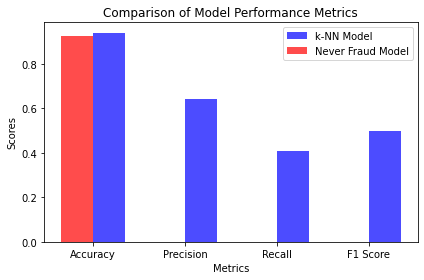

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
never_fraud_metrics = [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud]
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Plot bars
plt.bar(index + bar_width, knn_metrics, bar_width, label='k-NN Model', color='blue', alpha=0.7)
plt.bar(index, never_fraud_metrics, bar_width, label='Never Fraud Model', color='red', alpha=0.7)


# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
